In [4]:
import pandas as pd
from csvCreator import get_readable_date
import numpy as np

In [5]:
def to_evenly_spaced(df):
    date = df['time'].apply(lambda x: get_readable_date(x))
    df.insert(loc=1, column='date', value=date)
    median = np.trunc(df.groupby('date').size().median())
    df.drop(['date'], axis=1, inplace=True)
    day = np.trunc(len(df.index) / median)
    new_last_index = int(median * day)

    even_time = []
    firs_time = df[['time']].iloc[1].values.item()
    for i in range(len(df.index)):
        even_time.append(firs_time)
        firs_time += 60
    df.drop(['time'], axis=1, inplace=True)
#     df.insert(loc=0, column='time', value=even_time)
    df = df.iloc[:new_last_index]
    return df.drop(['phq_2'], axis=1), df.drop(['phq_1'], axis=1), int(median)

In [6]:
def generator(data, look_b, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + look_b
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + look_b, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + look_b
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           look_b // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - look_b, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, targets


In [7]:
output_path = '/Volumes/hex/ST1505558269-res/'
p = pd.read_csv(output_path + 'ST1505558269_1.0.csv')

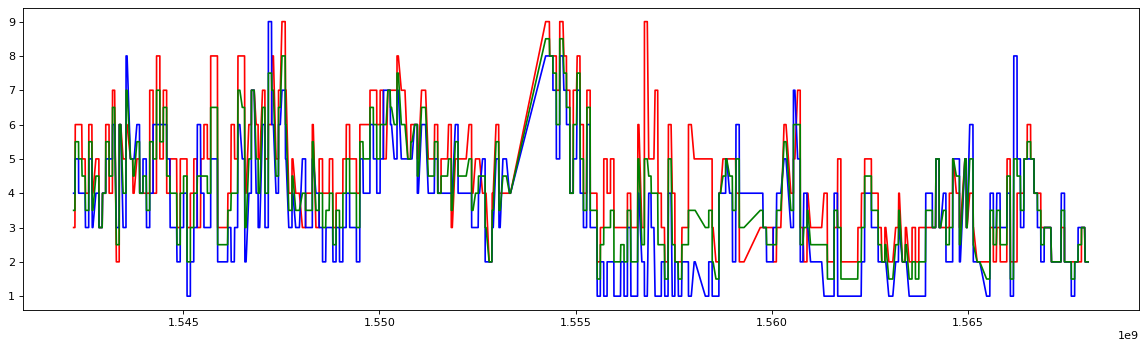

In [8]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p[['time']]
yaxis = p[['phq_1']]
yaxis2 = p[['phq_2']]
avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
pyplot.plot(xaxis, avg, color='green', label='avg')

In [9]:
p.head()

,time,window,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,...,tired,period,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1,phq_2
0,1.542201e+09,39.0,0.11,0.14,-0.22,0.32,-10.00,0.32,-0.07,11.22,...,3.0,0.0,6.0,90.0,90.0,0.0,0.0,30.0,3.0,4.0
1,1.542201e+09,60.0,0.11,0.02,-0.22,0.02,-10.02,0.02,-0.07,0.03,...,3.0,0.0,6.0,90.0,90.0,0.0,0.0,30.0,3.0,4.0
2,1.542201e+09,60.0,0.11,0.02,-0.21,0.02,-10.02,0.02,-0.07,0.02,...,3.0,0.0,6.0,90.0,90.0,0.0,0.0,30.0,3.0,4.0
3,1.542201e+09,61.0,0.11,0.02,-0.21,0.02,-10.02,0.02,-0.07,0.02,...,3.0,0.0,6.0,90.0,90.0,0.0,0.0,30.0,3.0,4.0
4,1.542201e+09,56.0,0.11,0.02,-0.21,0.02,-10.01,0.02,-0.07,0.02,...,3.0,0.0,6.0,90.0,90.0,0.0,0.0,30.0,3.0,4.0


In [10]:
# drop zero columns (or almost zeros)
p = p.drop(['work_time','date'], axis=1)

In [11]:
# just numerical data
p = p.drop([ 'window'], axis=1)
p_1, p_2, median = to_evenly_spaced(p)

In [12]:
float_data_1 = p_1.to_numpy()
p_1.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,mood,tense,tired,period,rumination,socialize,socialize_val,sport_time,day_sleep,phq_1
0,0.11,0.14,-0.22,0.32,-10.00,0.32,-0.07,11.22,-0.56,8.98,...,7.0,4.0,3.0,0.0,6.0,90.0,90.0,0.0,30.0,3.0
1,0.11,0.02,-0.22,0.02,-10.02,0.02,-0.07,0.03,-0.56,0.03,...,7.0,4.0,3.0,0.0,6.0,90.0,90.0,0.0,30.0,3.0
2,0.11,0.02,-0.21,0.02,-10.02,0.02,-0.07,0.02,-0.56,0.03,...,7.0,4.0,3.0,0.0,6.0,90.0,90.0,0.0,30.0,3.0
3,0.11,0.02,-0.21,0.02,-10.02,0.02,-0.07,0.02,-0.56,0.03,...,7.0,4.0,3.0,0.0,6.0,90.0,90.0,0.0,30.0,3.0
4,0.11,0.02,-0.21,0.02,-10.01,0.02,-0.07,0.02,-0.56,0.03,...,7.0,4.0,3.0,0.0,6.0,90.0,90.0,0.0,30.0,3.0


In [13]:
float_data_2 = p_2.to_numpy()
p_2.head()

,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,gyrY_std,...,mood,tense,tired,period,rumination,socialize,socialize_val,sport_time,day_sleep,phq_2
0,0.11,0.14,-0.22,0.32,-10.00,0.32,-0.07,11.22,-0.56,8.98,...,7.0,4.0,3.0,0.0,6.0,90.0,90.0,0.0,30.0,4.0
1,0.11,0.02,-0.22,0.02,-10.02,0.02,-0.07,0.03,-0.56,0.03,...,7.0,4.0,3.0,0.0,6.0,90.0,90.0,0.0,30.0,4.0
2,0.11,0.02,-0.21,0.02,-10.02,0.02,-0.07,0.02,-0.56,0.03,...,7.0,4.0,3.0,0.0,6.0,90.0,90.0,0.0,30.0,4.0
3,0.11,0.02,-0.21,0.02,-10.02,0.02,-0.07,0.02,-0.56,0.03,...,7.0,4.0,3.0,0.0,6.0,90.0,90.0,0.0,30.0,4.0
4,0.11,0.02,-0.21,0.02,-10.01,0.02,-0.07,0.02,-0.56,0.03,...,7.0,4.0,3.0,0.0,6.0,90.0,90.0,0.0,30.0,4.0


In [14]:
median

756

In [15]:
# first 189 days as training
mean = float_data_1[:142884].mean(axis=0)
float_data_1 -= mean
std = float_data_1[:142884].std(axis=0)
float_data_1 /= std

In [16]:
# first 189 days as training
mean = float_data_2[:142884].mean(axis=0)
float_data_2 -= mean
std = float_data_2[:142884].std(axis=0)
float_data_2 /= std

In [17]:
float_data_1[0]

array([-0.10400448, -1.17664153,  1.21275921, -1.09307108, -3.32076801,
       -1.09307108,  0.02086617, -0.81820893, -0.02159261, -0.67214433,
       -0.08429077, -0.83485919, -0.13687879, -0.19710486, -1.94785053,
        1.80932847,  0.89562613, -0.33512996,  0.04308262, -0.88757135,
       -0.57037565, -0.8159341 ,  0.7391157 , -0.49803086, -0.81789448,
       -0.42962736,  0.61176123,  2.04014717,  1.41033109, -0.81453467,
        0.28344566, -1.0866529 ])

In [18]:
float_data_2[0]

array([-0.10400448, -1.17664153,  1.21275921, -1.09307108, -3.32076801,
       -1.09307108,  0.02086617, -0.81820893, -0.02159261, -0.67214433,
       -0.08429077, -0.83485919, -0.13687879, -0.19710486, -1.94785053,
        1.80932847,  0.89562613, -0.33512996,  0.04308262, -0.88757135,
       -0.57037565, -0.8159341 ,  0.7391157 , -0.49803086, -0.81789448,
       -0.42962736,  0.61176123,  2.04014717,  1.41033109, -0.81453467,
        0.28344566,  0.15969156])

In [19]:
# assume each day got 744 value (average value) that means 17 value per Hour.
# most probably will be 3
# step = 60 / (median / 24)
step = 3
# observations will look back 7 days (average)
look_back = step * 7 * 24
delay = 24 * step

# one day
batch_size = median

In [20]:
batch_size

756

In [21]:
step

3

In [22]:
print (len(p_1))
print (len(p_2))

195804
195804


In [23]:
# for phq-1
train_gen_1 = generator(float_data_1,
                      look_b=look_back,
                      delay=delay,
                      min_index=0,
                      max_index=142884,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen_1 = generator(float_data_1,
                    look_b=look_back,
                    delay=delay,
                    min_index=142885,
                    max_index=173124,
                    step=step,
                    batch_size=batch_size)
test_gen_1 = generator(float_data_1,
                     look_b=look_back,
                     delay=delay,
                     min_index=173125,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)


In [36]:
# for phq-1
train_gen_2 = generator(float_data_2,
                      look_b=look_back,
                      delay=delay,
                      min_index=0,
                      max_index=142884,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen_2 = generator(float_data_2,
                    look_b=look_back,
                    delay=delay,
                    min_index=142885,
                    max_index=173124,
                    step=step,
                    batch_size=batch_size)
test_gen_2 = generator(float_data_2,
                     look_b=look_back,
                     delay=delay,
                     min_index=173125,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

In [24]:
test_steps = (len(p_1.index) - 173124)//batch_size
val_steps = (173124 - 142884)//batch_size
per_epoch =142884//batch_size
per_epoch

189

In [25]:
val_steps 

40

In [26]:
test_steps

30

In [47]:
def evaluate_naive_model(v_gen):
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(v_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

In [48]:
evaluate_naive_model(val_gen_1)

1.3140343111141615


In [49]:
evaluate_naive_model(val_gen_2)

1.2567624885979598


# One GRU layer Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [50]:
model = Sequential()
model.add(layers.GRU(40, input_shape=(None, float_data_1.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimzer=RMSprop(), loss='mae')
history = model.fit(train_gen_1,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_1,
                    validation_steps=val_steps)


Train for 189 steps, validate for 40 steps
Epoch 1/20
189/189 [==============================] - 115s 608ms/step - loss: 0.2571 - val_loss: 0.1630
Epoch 2/20
189/189 [==============================] - 105s 554ms/step - loss: 0.1373 - val_loss: 0.1479
Epoch 3/20
189/189 [==============================] - 104s 549ms/step - loss: 0.1267 - val_loss: 0.1170
Epoch 4/20
189/189 [==============================] - 101s 535ms/step - loss: 0.1209 - val_loss: 0.1190
Epoch 5/20
189/189 [==============================] - 104s 550ms/step - loss: 0.1180 - val_loss: 0.0993
Epoch 6/20
189/189 [==============================] - 105s 556ms/step - loss: 0.1148 - val_loss: 0.0947
Epoch 7/20
189/189 [==============================] - 104s 549ms/step - loss: 0.1124 - val_loss: 0.1091
Epoch 8/20
189/189 [==============================] - 103s 547ms/step - loss: 0.1113 - val_loss: 0.1017
Epoch 9/20
189/189 [==============================] - 104s 548ms/step - loss: 0.1089 - val_loss: 0.0875
Epoch 10/20
189/189 [

In [90]:
model.save('model_1_269.h5')

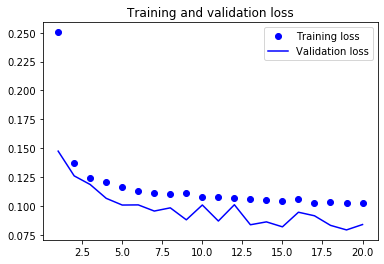

In [91]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [92]:
model.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 4s 150ms/step - loss: 0.0590


0.05903584435582161

In [27]:
from tensorflow.keras.models import load_model
model = load_model('models/model_1_269.h5')
model.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 5s 168ms/step - loss: 0.0590


0.05903584435582161

# One GRU unit for phq-2

In [93]:
model_1_2 = Sequential()
model_1_2.add(layers.GRU(32, input_shape=(None, float_data_2.shape[-1])))
model_1_2.add(layers.Dense(1))

model_1_2.compile(optimzer=RMSprop(), loss='mae')
history_1_2 = model_1_2.fit(train_gen_2,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_2,
                    validation_steps=val_steps)


Train for 189 steps, validate for 40 steps
Epoch 1/20
189/189 [==============================] - 93s 494ms/step - loss: 0.2255 - val_loss: 0.1568
Epoch 2/20
189/189 [==============================] - 88s 468ms/step - loss: 0.1289 - val_loss: 0.1500
Epoch 3/20
189/189 [==============================] - 88s 465ms/step - loss: 0.1175 - val_loss: 0.1306
Epoch 4/20
189/189 [==============================] - 88s 467ms/step - loss: 0.1121 - val_loss: 0.1312
Epoch 5/20
189/189 [==============================] - 88s 468ms/step - loss: 0.1092 - val_loss: 0.1102
Epoch 6/20
189/189 [==============================] - 89s 468ms/step - loss: 0.1067 - val_loss: 0.1224
Epoch 7/20
189/189 [==============================] - 89s 468ms/step - loss: 0.1051 - val_loss: 0.1129
Epoch 8/20
189/189 [==============================] - 88s 467ms/step - loss: 0.1029 - val_loss: 0.1010
Epoch 9/20
189/189 [==============================] - 89s 469ms/step - loss: 0.1014 - val_loss: 0.1047
Epoch 10/20
189/189 [=========

In [94]:
model.save('model_1_2_269.h5')

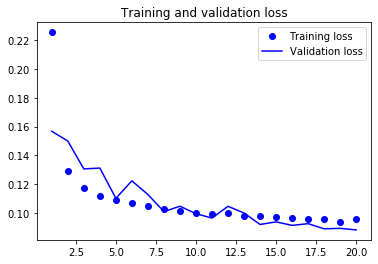

In [95]:
loss = history_1_2.history['loss']
val_loss = history_1_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [96]:
model_1_2.evaluate(test_gen_2, steps=30)

30/30 [==============================] - 5s 168ms/step - loss: 0.0853


0.08527613260472815

# 1D convenet

In [97]:
model_2 = Sequential()
model_2.add(layers.Conv1D(32, 5, activation='relu',
                            input_shape=(None, float_data_1.shape[-1])))
model_2.add(layers.MaxPooling1D(3))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.MaxPooling1D(3))
model_2.add(layers.Conv1D(32, 5, activation='relu'))
model_2.add(layers.GlobalMaxPooling1D())
model_2.add(layers.Dense(1))

model_2.compile(optimizer=RMSprop(), loss='mae')
history_2 = model_2.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Train for 189 steps, validate for 40 steps
Epoch 1/20
189/189 [==============================] - 42s 225ms/step - loss: 0.3844 - val_loss: 0.4130
Epoch 2/20
189/189 [==============================] - 43s 228ms/step - loss: 0.2656 - val_loss: 0.3182
Epoch 3/20
189/189 [==============================] - 42s 224ms/step - loss: 0.2342 - val_loss: 0.3928
Epoch 4/20
189/189 [==============================] - 42s 223ms/step - loss: 0.2125 - val_loss: 0.3201
Epoch 5/20
189/189 [==============================] - 42s 220ms/step - loss: 0.1965 - val_loss: 0.3825
Epoch 6/20
189/189 [==============================] - 41s 218ms/step - loss: 0.1857 - val_loss: 0.3435
Epoch 7/20
189/189 [==============================] - 47s 248ms/step - loss: 0.1744 - val_loss: 0.4429
Epoch 8/20
189/189 [==============================] - 46s 243ms/step - loss: 0.1663 - val_loss: 0.3534
Epoch 9/20
189/189 [==============================] - 45s 236ms/step - loss: 0.1607 - val_loss: 0.4376
Epoch 10/20
189/189 [=========

In [98]:
model_2.save('model_2_770.h5') 

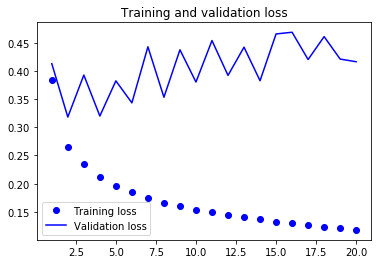

In [106]:
import matplotlib.pyplot as plt
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [107]:
model_2.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 3s 90ms/step - loss: 0.4929


0.4929492565492789

# 1D convnet and GRU model

In [108]:

model_3 = Sequential()
model_3.add(layers.Conv1D(32, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_3.add(layers.MaxPooling1D(3))
model_3.add(layers.Conv1D(32, 5, activation='relu'))
model_3.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.3))
model_3.add(layers.Dense(1))

model_3.summary()
model_3.compile(optimizer=RMSprop(), loss='mae')
history_3 = model_3.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 16,673
Trainable params: 16,673
Non-trainable params: 0
_________________________________________________________________
Train for 189 steps, validate for 40 steps
Epoch 1/20
189/189 [==============================] - 80s 421ms/step - lo

In [109]:
model_3.save('model_3_269.h5') 

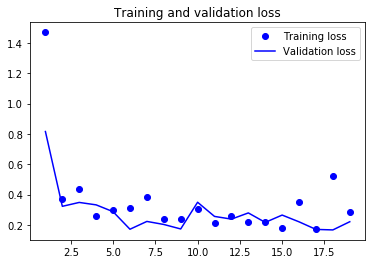

In [110]:
loss = history_3.history['loss'][1:]
val_loss = history_3.history['val_loss'][1:]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [112]:
model_3.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 4s 120ms/step - loss: 0.2748


0.27478883067766824

In [113]:
model_7 = Sequential()
model_7.add(layers.Conv1D(32, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_7.add(layers.MaxPooling1D(3))
model_7.add(layers.Conv1D(32, 5, activation='relu'))
model_7.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2))
model_7.add(layers.Dense(1))

model_7.summary()
model_7.compile(optimizer=RMSprop(), loss='mae')
history_7 = model_7.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=10,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 16,673
Trainable params: 16,673
Non-trainable params: 0
_________________________________________________________________
Train for 189 steps, validate for 40 steps
Epoch 1/10
189/189 [==============================] - 74s 393ms/step - lo

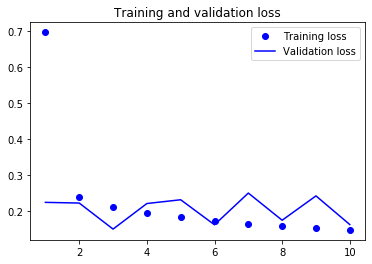

In [114]:
loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [116]:
model_7.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 4s 117ms/step - loss: 0.2180


0.21803330443799496

# One GRU layer with recurrent dropout

In [118]:
model_4 = Sequential()
model_4.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.1,
                     input_shape=(None, float_data_1.shape[-1])))
model_4.add(layers.Dense(1))

model_4.compile(optimizer=RMSprop(), loss='mae')
history_4 = model_4.fit(train_gen_1,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_1,
                    validation_steps=val_steps)


Train for 189 steps, validate for 40 steps
Epoch 1/20
189/189 [==============================] - 174s 923ms/step - loss: 138.1558 - val_loss: 0.8659
Epoch 2/20
189/189 [==============================] - 187s 988ms/step - loss: 1.3813 - val_loss: 0.5245
Epoch 3/20
189/189 [==============================] - 191s 1s/step - loss: 0.3070 - val_loss: 0.2305
Epoch 4/20
189/189 [==============================] - 193s 1s/step - loss: 0.2114 - val_loss: 0.1892
Epoch 5/20
189/189 [==============================] - 189s 1s/step - loss: 0.1891 - val_loss: 0.1850
Epoch 6/20
189/189 [==============================] - 244s 1s/step - loss: 0.1837 - val_loss: 0.1619
Epoch 7/20
189/189 [==============================] - 200s 1s/step - loss: 0.1798 - val_loss: 0.1628
Epoch 8/20
189/189 [==============================] - 173s 915ms/step - loss: 0.1816 - val_loss: 0.1727
Epoch 9/20
189/189 [==============================] - 176s 931ms/step - loss: 0.1887 - val_loss: 0.1557
Epoch 10/20
189/189 [=============

In [119]:
model_4.save('model_4_269.h5') 

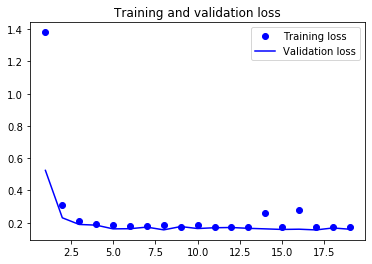

In [120]:
loss = history_4.history['loss'][1:]
val_loss = history_4.history['val_loss'][1:]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

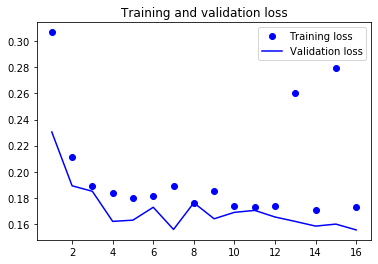

In [121]:
loss = history_4.history['loss'][2:-2]
val_loss = history_4.history['val_loss'][2:-2]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [122]:
model_4.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 5s 177ms/step - loss: 0.1521


0.1521023831019799

In [123]:
model_5 = Sequential()
model_5.add(layers.Conv1D(64, 5, activation='relu',
                          input_shape=(None, float_data_1.shape[-1])))
model_5.add(layers.MaxPooling1D(3))
model_5.add(layers.Conv1D(64, 5, activation='relu'))
model_5.add(layers.GRU(64, dropout=0.1, recurrent_dropout=0.2))
model_5.add(layers.Dense(1))

model_5.summary()
model_5.compile(optimizer=RMSprop(), loss='mae')
history_5 = model_5.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, None, 64)          10304     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 64)          20544     
_________________________________________________________________
gru_7 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 55,873
Trainable params: 55,873
Non-trainable params: 0
_________________________________________________________________
Train for 189 steps, validate for 40 steps
Epoch 1/20
189/189 [==============================] - 139s 733ms/step - l

In [124]:
model_5.save('model_5_269.h5') 

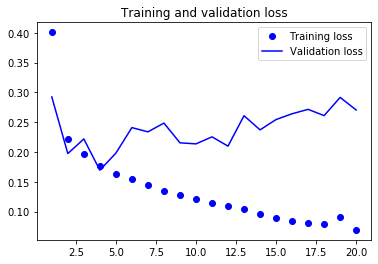

In [125]:
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [126]:
model_5.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 5s 178ms/step - loss: 0.2647


0.2646584336956342

In [96]:
from tensorflow.keras.optimizers import Adam

model_6 = Sequential()
model_6.add(layers.LSTM(30,input_shape=(None, float_data_1.shape[-1])))
model_6.add(layers.Dense(1, activation='linear'))

model_6.summary()
model_6.compile(optimizer=Adam(lr=0.001), loss='mse')
history_6 = model_6.fit(train_gen_1,
                        steps_per_epoch=per_epoch,
                        epochs=20,
                        validation_data=val_gen_1,
                        validation_steps=val_steps)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30)                7560      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 7,591
Trainable params: 7,591
Non-trainable params: 0
_________________________________________________________________
Train for 156 steps, validate for 40 steps
Epoch 1/20
156/156 [==============================] - 81s 516ms/step - loss: 0.3558 - val_loss: 0.3167
Epoch 2/20
156/156 [==============================] - 60s 384ms/step - loss: 0.2056 - val_loss: 0.4160
Epoch 3/20
156/156 [==============================] - 58s 371ms/step - loss: 0.1178 - val_loss: 0.4788
Epoch 4/20
156/156 [==============================] - 61s 389ms/step - loss: 0.0793 - val_loss: 0.4965
Epoch 5/20
156/156 [==============================] - 55s 

KeyboardInterrupt: 

In [88]:
model_5.save('model_6_269.h5') 

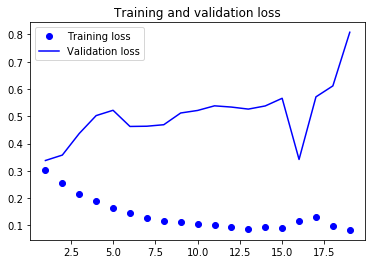

In [95]:
loss = history_6.history['loss'][1:]
val_loss = history_6.history['val_loss'][1:]

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [90]:
model_6.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 2s 72ms/step - loss: 1.3153


1.3153438044711947

In [26]:
model_temp = Sequential()
model_temp.add(layers.GRU(32, input_shape=(None, float_data_1.shape[-1])))
model_temp.add(layers.Dense(1))

model_temp.compile(optimzer=RMSprop(), loss='mae')
histor = model_temp.fit(train_gen_1,
                    steps_per_epoch=per_epoch,
                    epochs=20,
                    validation_data=val_gen_1,
                    validation_steps=val_steps)


Train for 189 steps, validate for 40 steps
Epoch 1/20
189/189 [==============================] - 90s 477ms/step - loss: 0.5395 - val_loss: 0.2797
Epoch 2/20
189/189 [==============================] - 89s 473ms/step - loss: 0.2238 - val_loss: 0.2050
Epoch 3/20
189/189 [==============================] - 87s 461ms/step - loss: 0.1796 - val_loss: 0.1867
Epoch 4/20
189/189 [==============================] - 85s 450ms/step - loss: 0.1637 - val_loss: 0.1778
Epoch 5/20
189/189 [==============================] - 85s 452ms/step - loss: 0.1531 - val_loss: 0.1787
Epoch 6/20
189/189 [==============================] - 88s 464ms/step - loss: 0.1482 - val_loss: 0.1716
Epoch 7/20
189/189 [==============================] - 87s 458ms/step - loss: 0.1421 - val_loss: 0.1687
Epoch 8/20
189/189 [==============================] - 86s 456ms/step - loss: 0.1383 - val_loss: 0.1517
Epoch 9/20
189/189 [==============================] - 86s 456ms/step - loss: 0.1347 - val_loss: 0.1524
Epoch 10/20
189/189 [=========

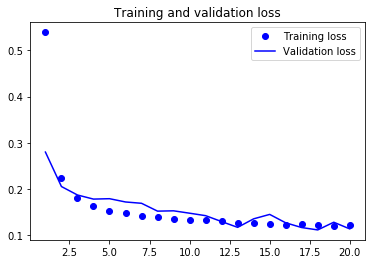

In [29]:
import matplotlib.pyplot as plt

loss = histor.history['loss']
val_loss = histor.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
model_temp.evaluate(test_gen_1, steps=30)

30/30 [==============================] - 5s 155ms/step - loss: 0.1075


0.10749420622984568

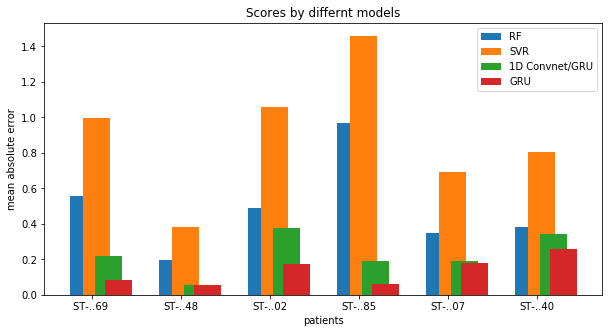

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['ST-..69 ', 'ST-..48', 'ST-..02', 'ST-..85', 'ST-..07', 'ST-..40']
rf = [0.5592, 0.1968, 0.4892, 0.9697, 0.3479, 0.3805]
svr = [0.9987, 0.3810, 1.0559, 1.4592, 0.6924, 0.8022]
gru = [0.0852, 0.0528, 0.1709, 0.0609, 0.1781, 0.2563]
convnet_gru = [0.2180, 0.0570, 0.3772, 0.1921, 0.1921, 0.3404]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/3, rf, width, label='RF')
rects2 = ax.bar(x + width/3 - 0.05, svr, width, label='SVR')
rects3 = ax.bar(x + (2.9*width/3) - 0.1, convnet_gru, width, label='1D Convnet/GRU')
rects2 = ax.bar(x + width/3 + 0.2, gru, width, label='GRU')

# fig = plt.figure(f)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mean absolute error')
ax.set_xlabel('patients')
ax.set_title('Scores by differnt models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()




# fig.tight_layout()

plt.show()

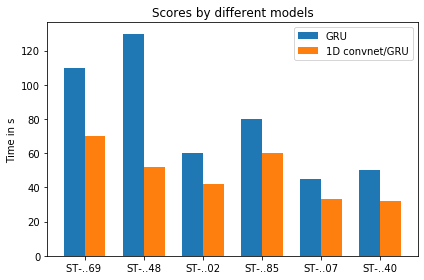

In [49]:
labels = ['ST-..69 ', 'ST-..48', 'ST-..02', 'ST-..85', 'ST-..07', 'ST-..40']
men_means = [110, 130, 60, 80, 45, 50]
women_means = [70, 52, 42, 60, 33, 32]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='GRU')
rects2 = ax.bar(x + width/2, women_means, width, label='1D convnet/GRU')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time in s')
ax.set_title('Scores by different models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()